In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('/Users/xin0/Downloads/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [245]:
# Check the covariance
df.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
free sulfur dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
total sulfur dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


In [246]:
# Replace spaces with _ for each column
df.columns = df.columns.str.replace(' ', '_')
# Check there are no missing values and no object data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [247]:
# Check the correlation
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


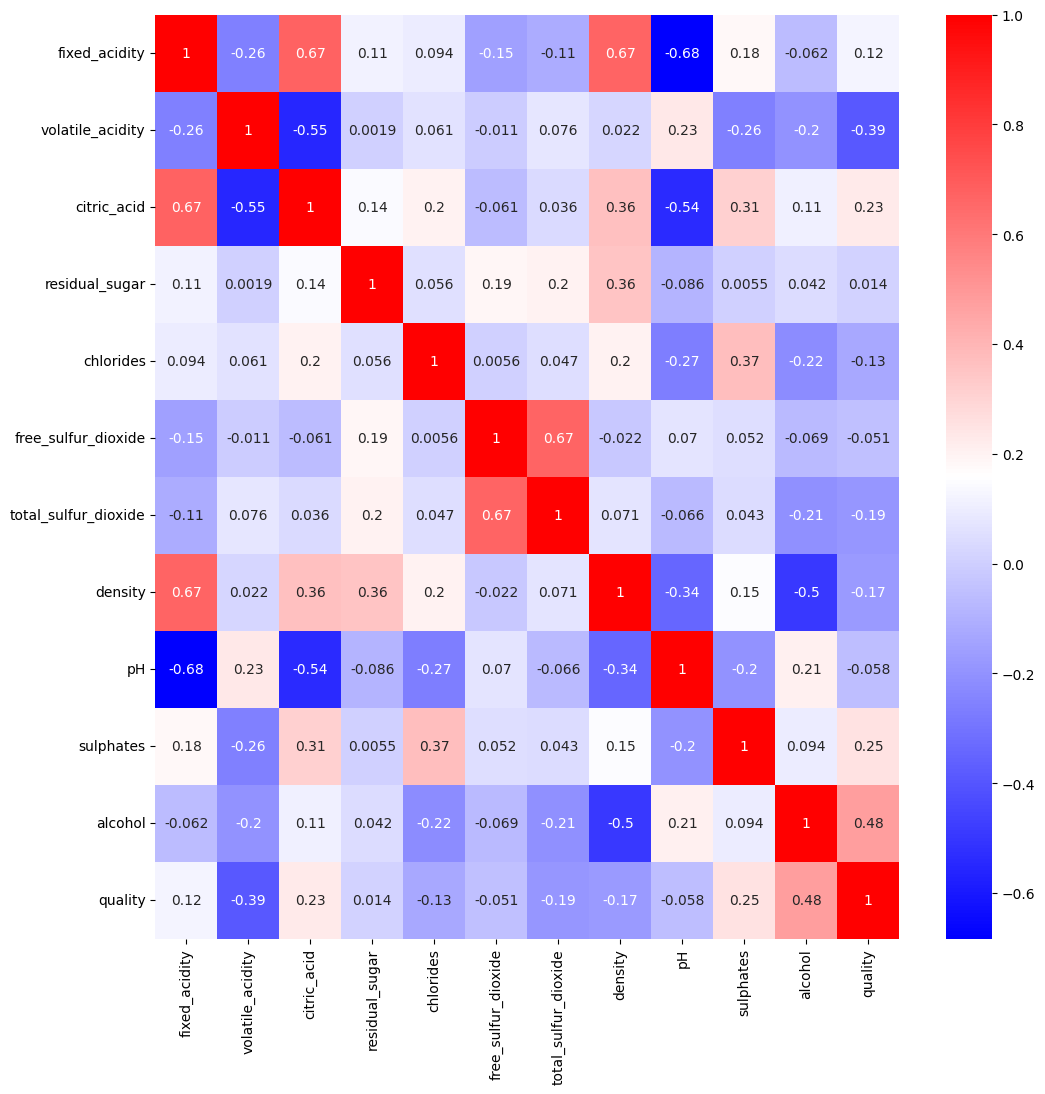

In [248]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot= True, cmap="bwr")
plt.show()

In [249]:
# show the covariance and the Pearson Correlation Coefficient between each of the 11 characteristics and the quality of the red wine
res = pd.DataFrame([df.cov().iloc[:, -1], df.corr().iloc[:, -1]], index=['covariance', 'correlation'])
res.drop(['quality'], axis=1, inplace=True)
res

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
covariance,0.174424,-0.056476,0.035612,0.015635,-0.004900,-0.427907,-4.917237,-0.000267,-0.007198,0.034413,0.409789
correlation,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166


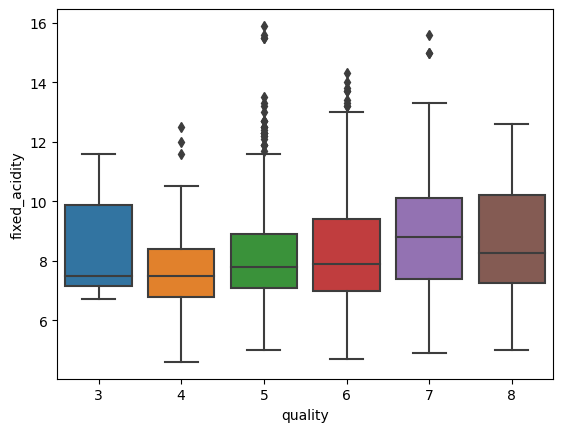

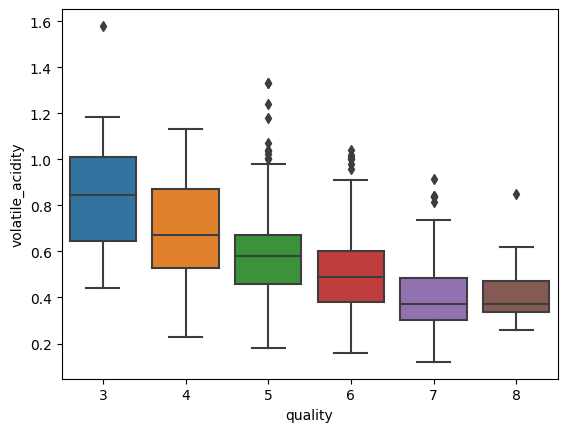

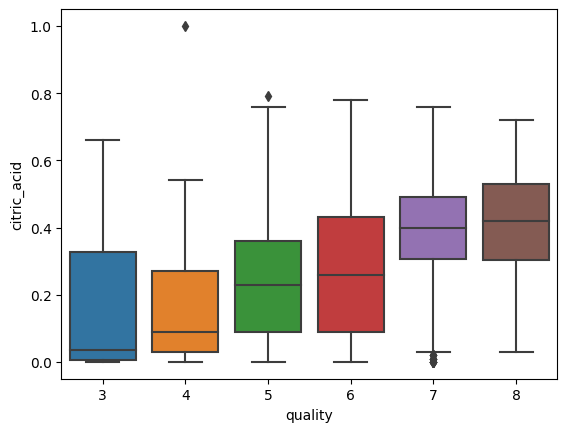

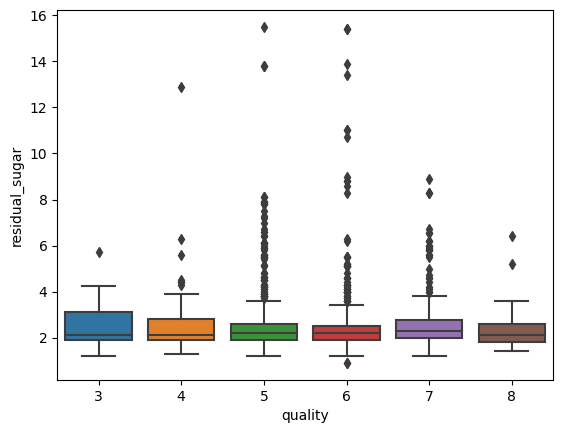

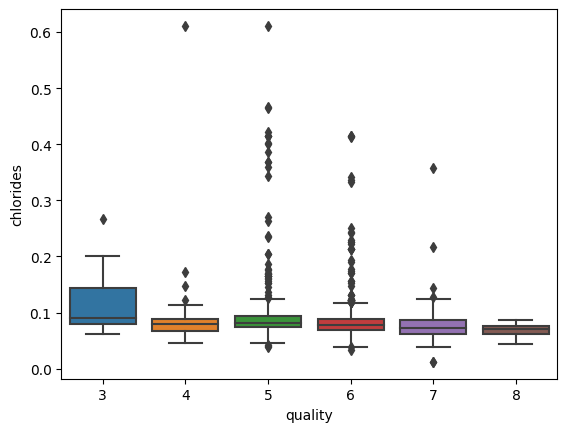

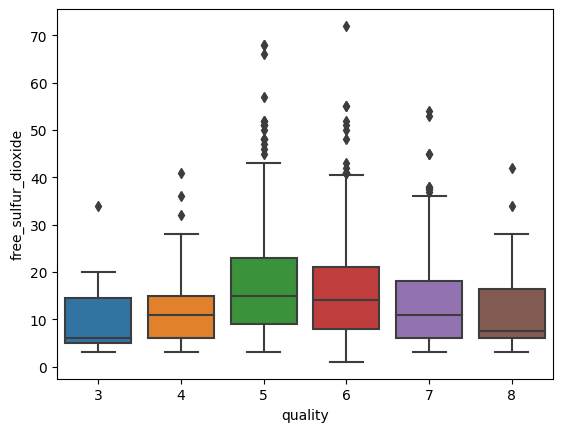

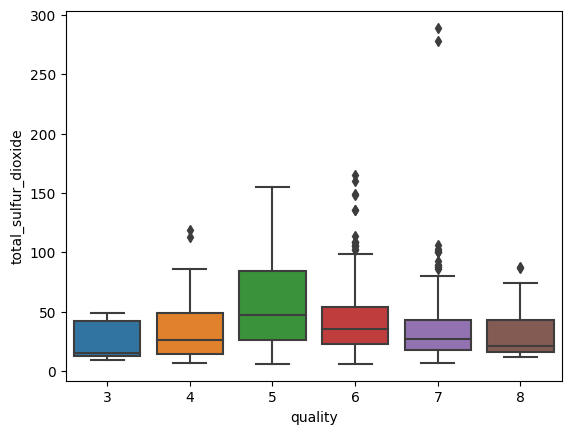

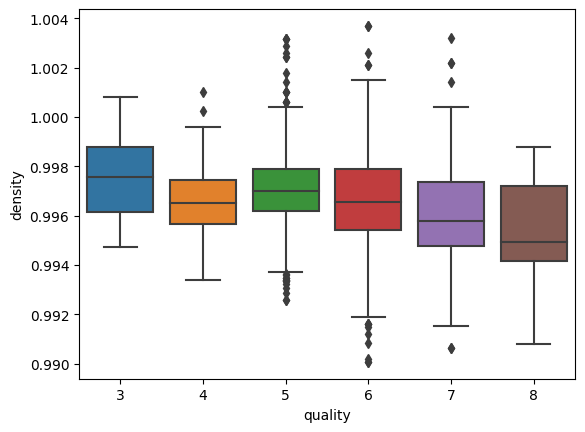

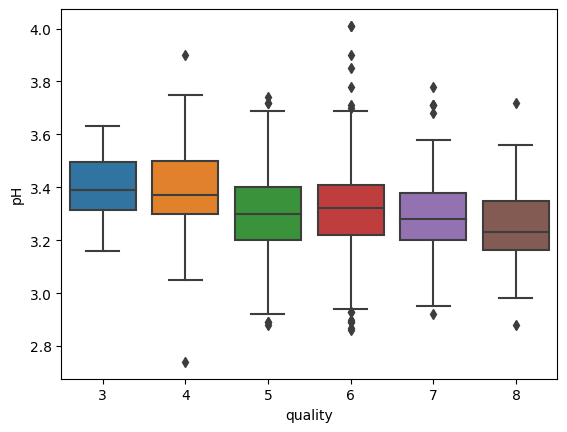

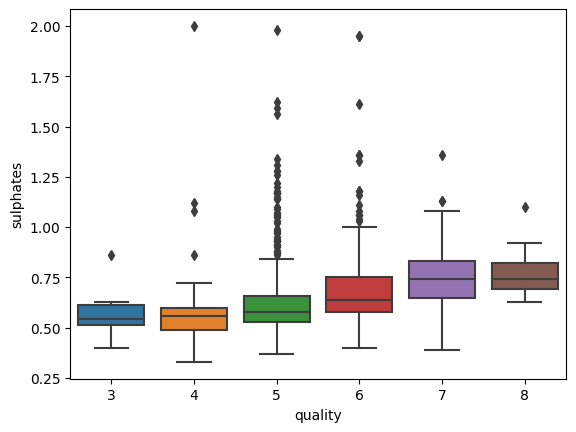

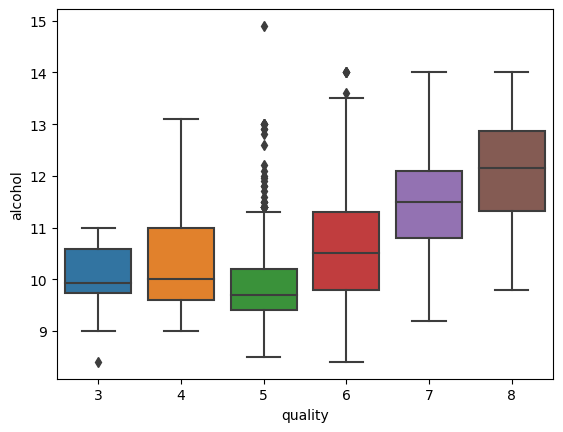

In [250]:
cols = df.columns
for i in cols:
    if i == "quality":
        break
    sns.boxplot(x="quality", y=i, data=df)
    plt.show()

- Highly Rated Wines has comparatively higher Alcohol, Citric Acid, and Sulphates.
- On the contrary, wines with high volatile acidity, density, and pH are low in Quality.
- Wines Quality has no significant relationship with total sulfur dioxide, free sulfur dioxide, chlorides, residual sugar, and fixed acidity.

In [251]:
x = df.loc[:,['alcohol','sulphates','citric_acid', 'volatile_acidity']]
y = df['quality']

In [252]:
# Separe our features from our target feature (quality) 
# and we split data intro training and test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(train_x, train_y)
y_prediction_lr = regressor.predict(test_x)
y_prediction_lr = np.round(y_prediction_lr)

In [253]:
# If the distance between our predicted quality and the true quality is 1 (in absolut value), 
# we will accept it as a correct prediction.
# It transforms predicted value into the true value if the distance between them is equal to 1
def one_accuracy(predicted, true):
	i = 0
	for x, y in zip(predicted, true):
		if(abs(x - y) == 1):
			predicted[i] = y
		i = i + 1

one_accuracy(y_prediction_lr, test_y)

print("Accuracy Score:", accuracy_score(test_y, y_prediction_lr))
print("classification Report:\n", classification_report(test_y, y_prediction_lr))
print("confusion Matrix:\n", confusion_matrix(test_y, y_prediction_lr))

Accuracy Score: 0.98125
classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.76      0.87        17
           5       0.99      1.00      0.99       195
           6       0.97      1.00      0.98       200
           7       1.00      0.98      0.99        61
           8       1.00      0.50      0.67         6

    accuracy                           0.98       480
   macro avg       0.83      0.71      0.75       480
weighted avg       0.98      0.98      0.98       480

confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0  13   0   4   0   0]
 [  0   0 195   0   0   0]
 [  0   0   0 200   0   0]
 [  0   0   1   0  60   0]
 [  0   0   0   3   0   3]]
